# IMPORT

In [70]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

# PLOTS

In [74]:
def plotBoxplot(data,name,k):
    for ai in range(len(data)):
        a = data[ai]
        x = round(np.sqrt(len(a))) 
        y = ceil(len(a)/x)
        
        for di in range(len(a)):
            d = a[di]

            plt.subplot(x, y, di+1)

            plt.boxplot(d)

            plt.title(name + ' activity ' + str(ai) + ' device ' + str(di))
        
        plt.savefig('Plots/' + name + '/'+str(k)+'-' + name.lower() + '-' + str(ai) + '.jpg')

        plt.show()

# READ FILE

In [72]:
dir_files = "../Dataset/"
            # rows = np.list(csv_reader).astype(np.float)

def readFiles():
    part = dict()
    for i in range(1):
        for d in range(1,6):
            file_name = dir_files + "part" + str(i) + "/part" + str(i) + "dev" + str(d) + ".csv"
            csv_file = open(file_name)
            csv_reader = csv.reader(csv_file, delimiter=',')
            rows = np.array(list(csv_reader))
            
            if(d == 1):
                part[i] = list([rows])
            else:
                part[i].append(rows)
        
        part[i]=np.array([np.array(xi).astype(float) for xi in part[i]])

    return part
part = readFiles()

# BOXPLOT

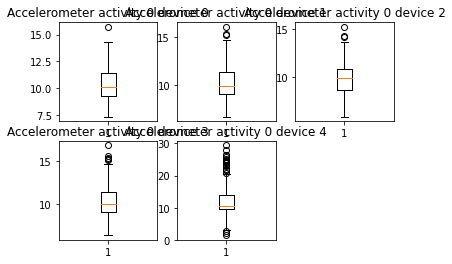

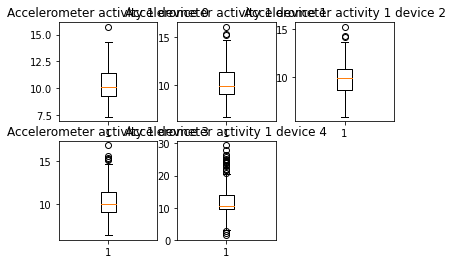

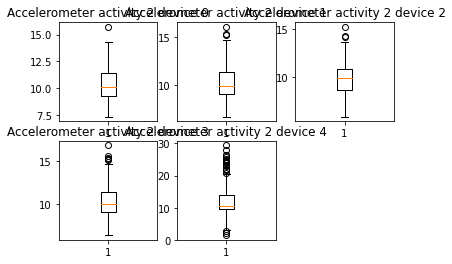

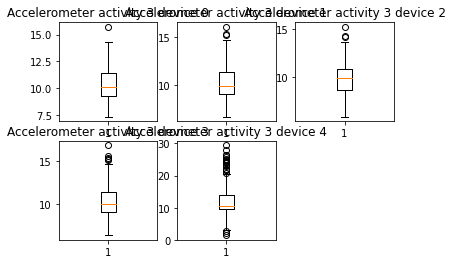

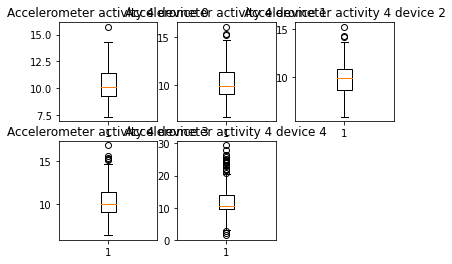

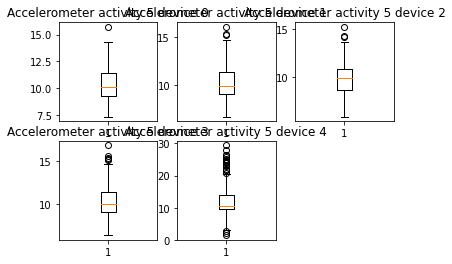

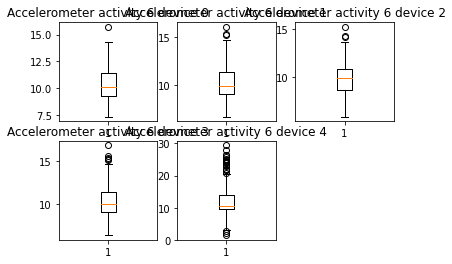

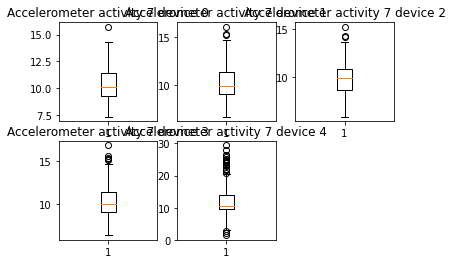

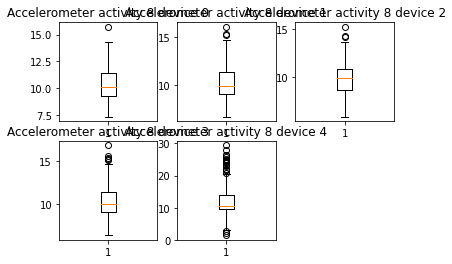

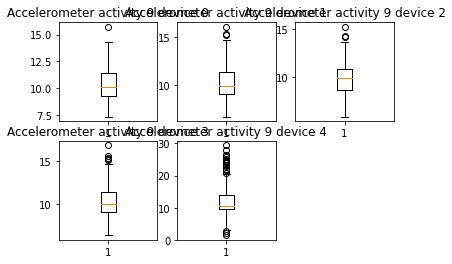

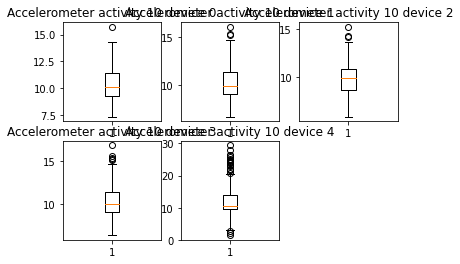

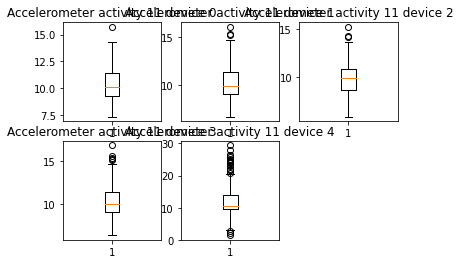

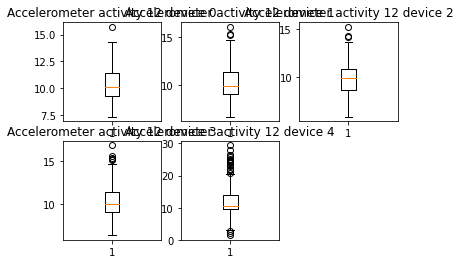

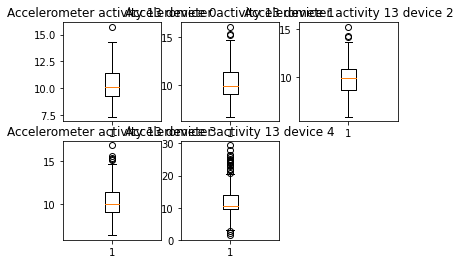

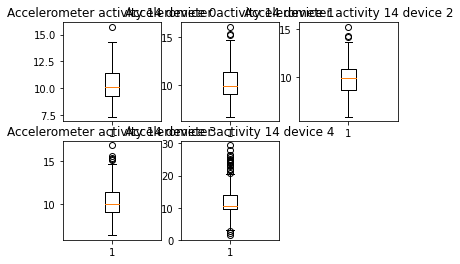

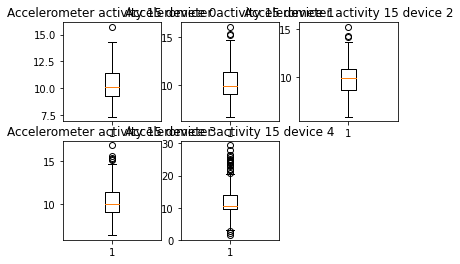

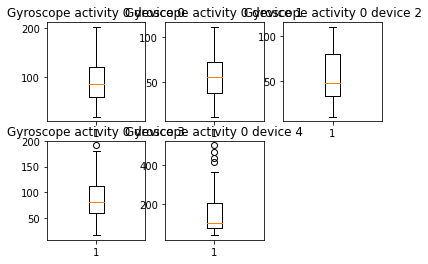

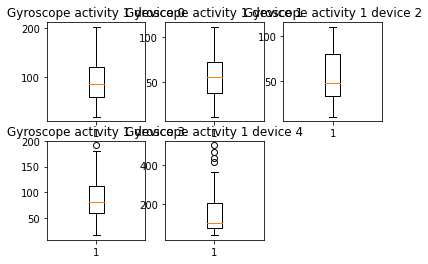

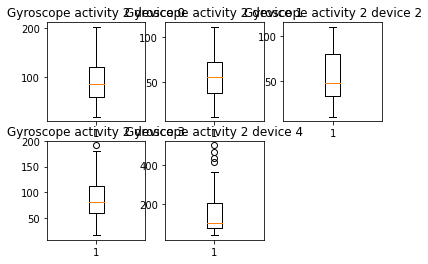

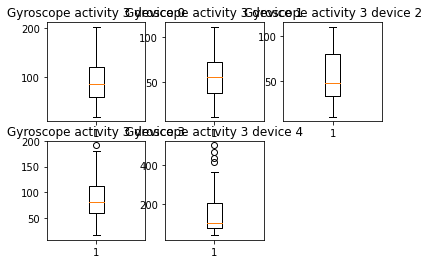

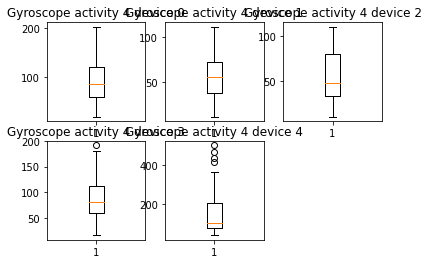

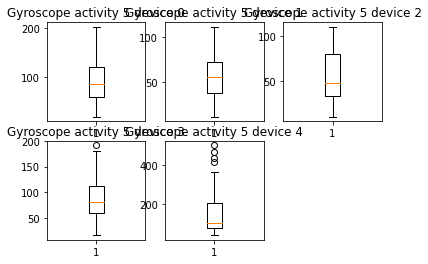

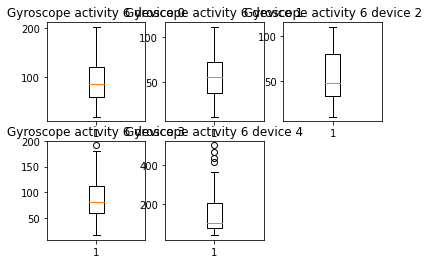

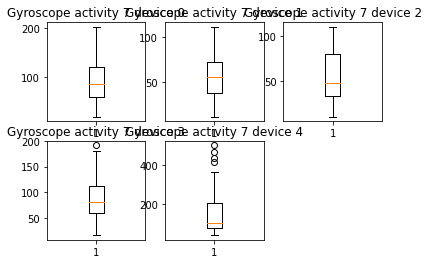

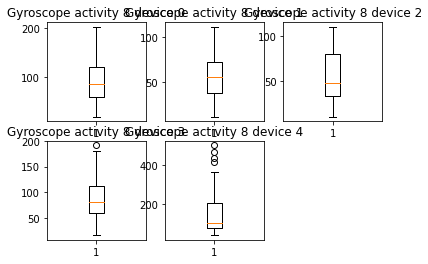

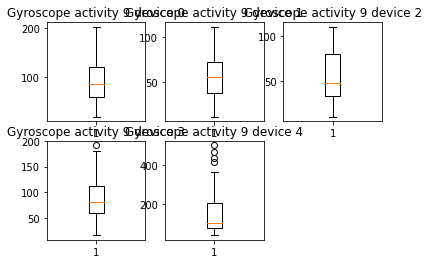

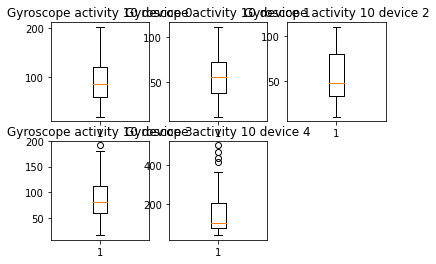

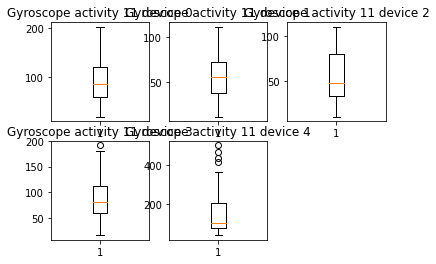

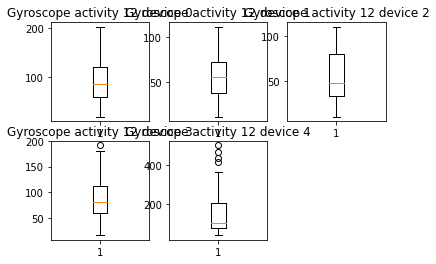

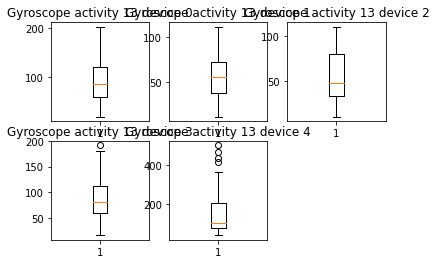

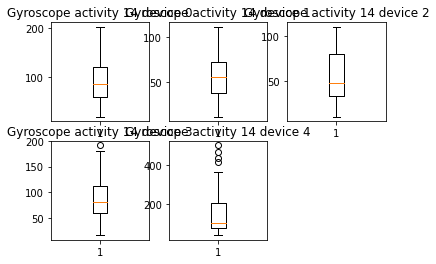

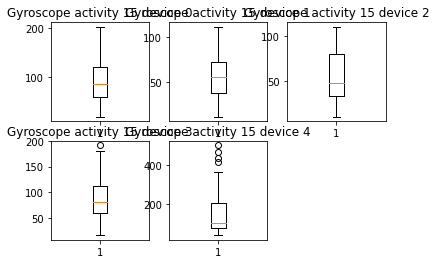

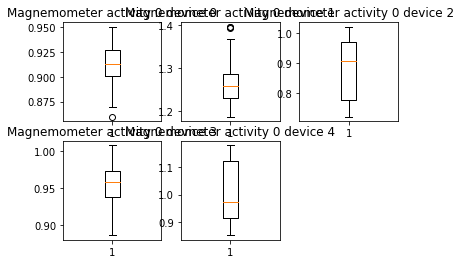

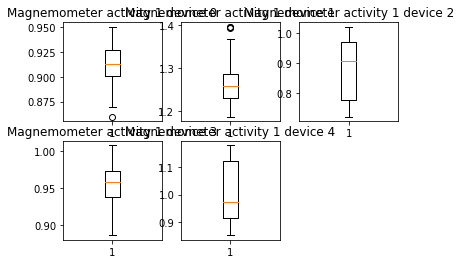

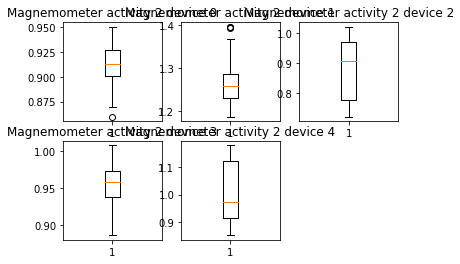

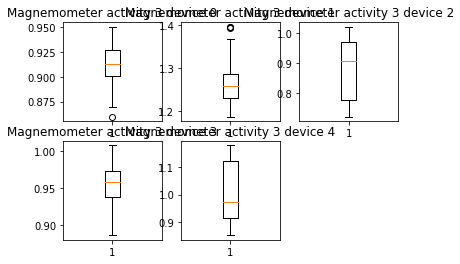

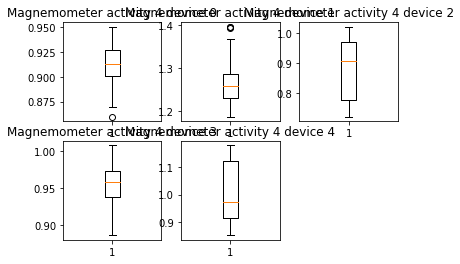

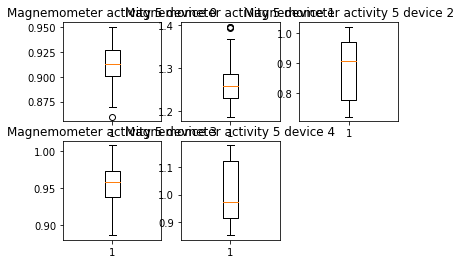

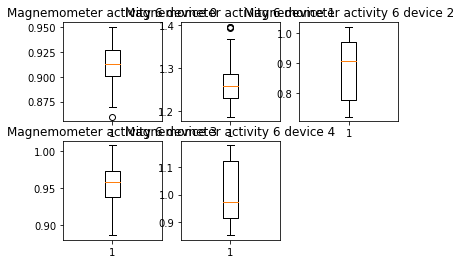

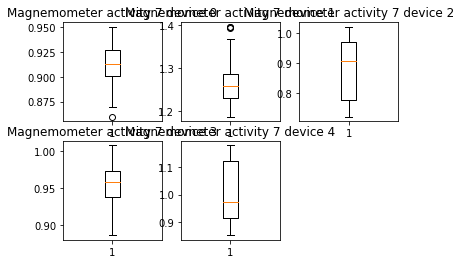

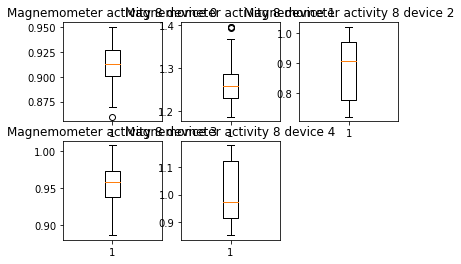

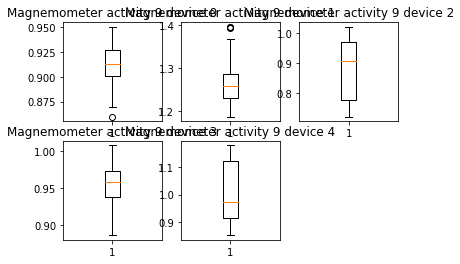

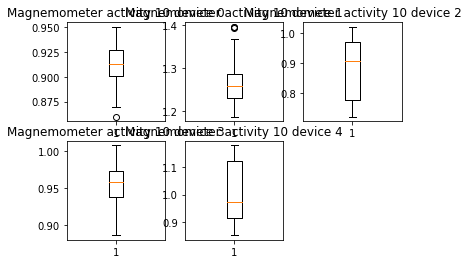

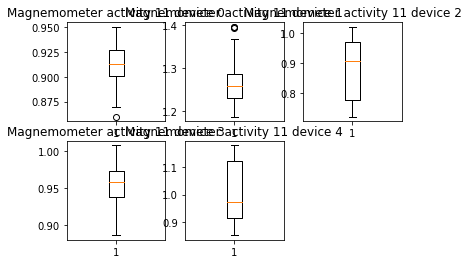

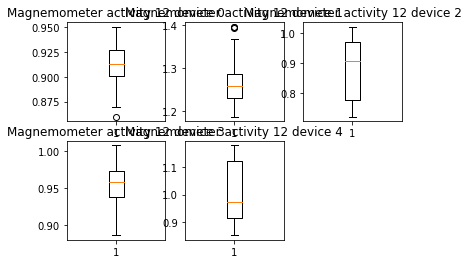

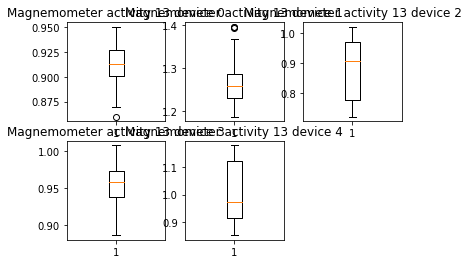

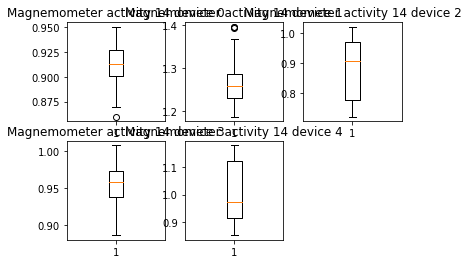

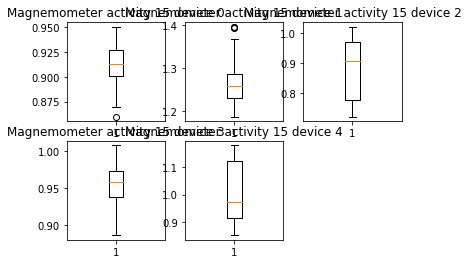

In [75]:
def boxplot(part):

    for k in part.keys():
        acc = [[list()] * 5] * 16
        gyr = [[list()] * 5] * 16
        mag = [[list()] * 5] * 16

        i = part[k]
        for di in range(len(i)):
            d = i[di]
            for a in range(1,17):
                pos = np.where(d[:,11] == a)[0]

                acc[a-1][di] = np.sqrt(d[pos,1]**2 + d[pos,2]**2 + d[pos,3]**2)

                gyr[a-1][di] = np.sqrt(d[pos,4]**2 + d[pos,5]**2 + d[pos,6]**2)

                mag[a-1][di] = np.sqrt(d[pos,7]**2 + d[pos,8]**2 + d[pos,9]**2)
                
        plotBoxplot(acc, "Accelerometer", k)

        plotBoxplot(gyr, "Gyroscope", k)
        
        plotBoxplot(mag, "Magnemometer", k)


boxplot(part)